# Practice 8

### Problem


Take the spectra and calibration curves from ./practice_8_data/. Recalculate the calibration curve to the spectral step (or vice versa) and perform calibration by dividing the spectral data by the calibration data.

PS The calibration curve shows the sensitivity of the detector at different wavelengths, and dividing by it allows you to correct data for different detector sensitivities. For example, such curves showing the spectral sensitivity of a photodetector can be found here https://www.thorlabs.de/newgrouppage9.cfm?objectgroup_id=3341&pn=PM100D

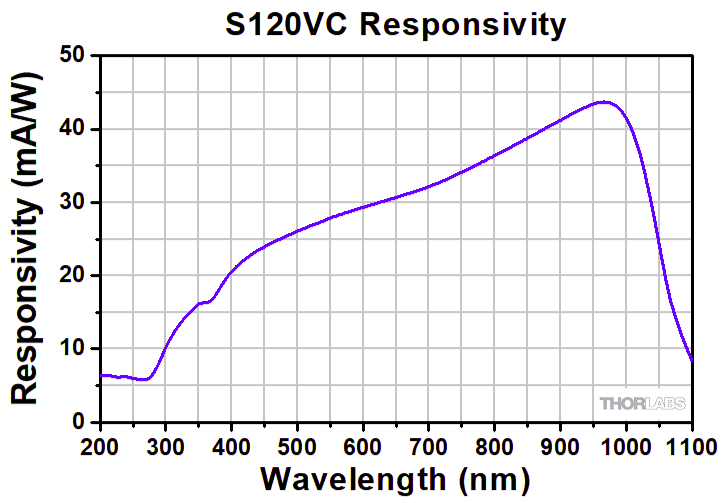